<a href="https://colab.research.google.com/github/Carlosbil/leetcode/blob/main/Practica1RegresionLineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 1 Regresión Lineal

**Dadas un par de  muestras de tamaño 150 sobre una población:**

**A) Determina la media y varianza muestral para cada una de las muestras**

**B) Determina la covarianza de la muestra y la correlación de Pearson**

**C) Atendiendo a la correlación de Pearson: ¿qué podemos afirmar sobre la relación entre las muestras?**

En el conjunto de datos Iris, que es comúnmente utilizado como ejemplo en estadísticas y aprendizaje automático, cada fila representa una flor de iris y contiene información sobre cuatro características diferentes de las flores:

**sepal_length (Longitud del sépalo)**: La longitud del sépalo, la parte externa de la flor que protege los pétalos en desarrollo. Es una de las medidas que se utilizan para describir la forma de la flor.

**petal_length (Longitud del pétalo)**: La longitud del pétalo, la parte coloreada y generalmente más vistosa de la flor. También es una medida importante para describir la forma de la flor.

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
iris = sns.load_dataset('iris')

In [ ]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Opciones para mostrar valores únicos

In [ ]:
A = iris['sepal_length'].values
B = iris['petal_length'].values

Text(0, 0.5, 'Frecuencia')

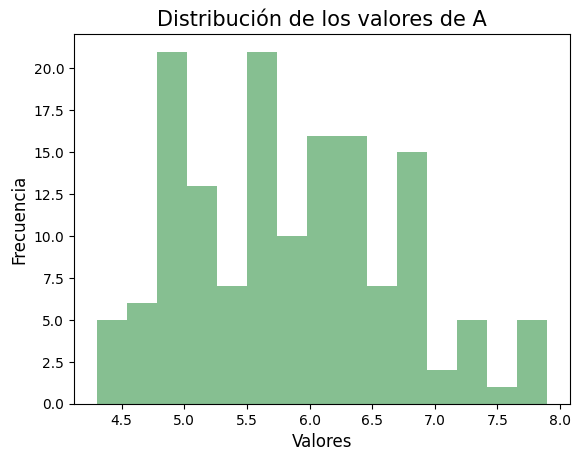

In [ ]:
plt.hist(A, bins=15, color='#86bf91')
plt.title('Distribución de los valores de A', fontsize=15)
plt.xlabel('Valores', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

Text(0, 0.5, 'Frecuencia')

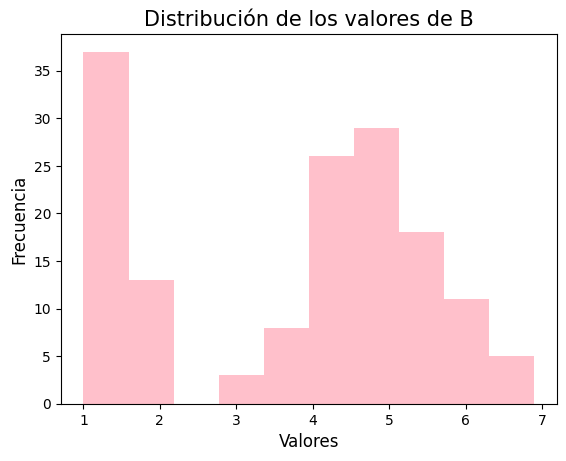

In [ ]:
plt.hist(B, bins=10, color='#FFC0CB')
plt.title('Distribución de los valores de B', fontsize=15)
plt.xlabel('Valores', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

Cálculo de medias y varianzas muestrales

**Medias**

In [ ]:
media_A=sum(A)/len(A)

In [ ]:
media_A

5.843333333333335

In [ ]:
A.mean()

5.843333333333334

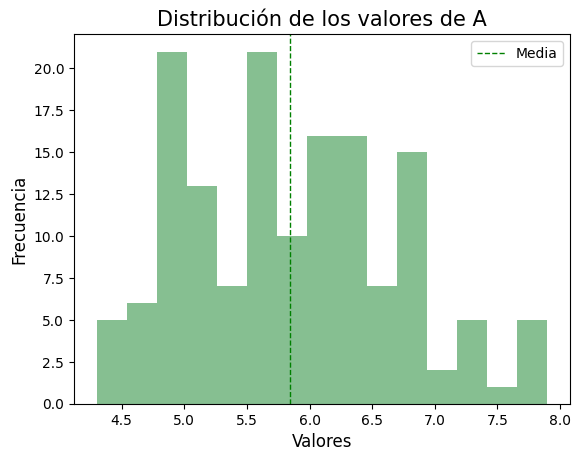

In [ ]:
plt.hist(A, bins=15, color='#86bf91')
plt.title('Distribución de los valores de A', fontsize=15)
plt.xlabel('Valores', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

plt.axvline(media_A, color='g', linestyle='dashed', linewidth=1, label='Media')
plt.legend()

In [ ]:
media_B=sum(B)/len(B)

In [ ]:
B.mean()

3.7580000000000005

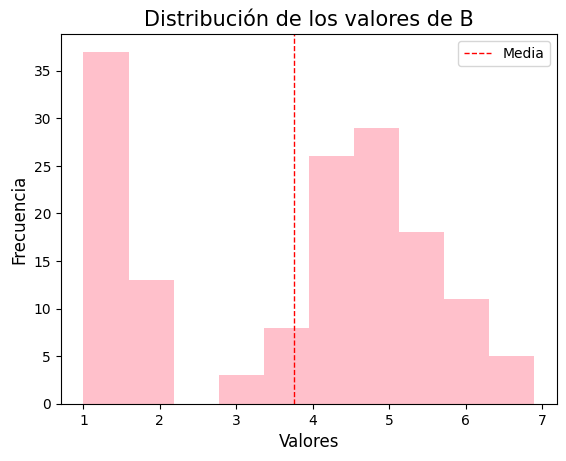

In [ ]:
plt.hist(B, bins=10, color='#FFC0CB')
plt.title('Distribución de los valores de B', fontsize=15)
plt.xlabel('Valores', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

plt.axvline(media_B, color='r', linestyle='dashed', linewidth=1, label='Media')
plt.legend()

**Varianzas**

In [ ]:
var_A= sum([(x-media_A)**2/(len(A)-1) for x in A])

In [ ]:
(A.std(ddof=1))**2

0.6856935123042507

In [ ]:
var_A

0.6856935123042509

**<span style="color:red">Nótese que el valor es diferente (uso de ddof)**

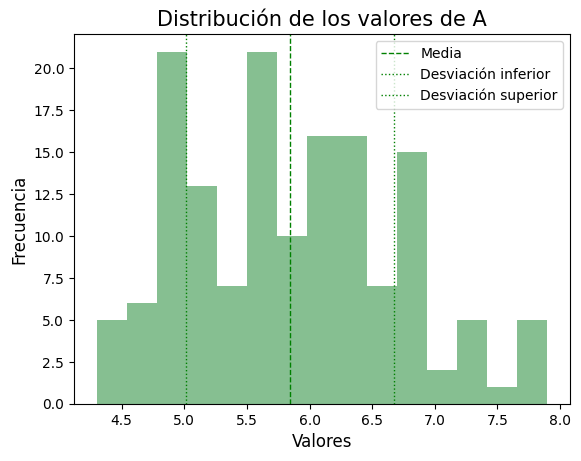

In [ ]:
plt.hist(A, bins=15, color='#86bf91')
plt.title('Distribución de los valores de A', fontsize=15)
plt.xlabel('Valores', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

plt.axvline(media_A, color='g', linestyle='dashed', linewidth=1, label='Media')

plt.axvline(media_A-A.std(ddof=1), color='g', linestyle='dotted', linewidth=1, label='Desviación inferior')
plt.axvline(media_A+A.std(ddof=1), color='g', linestyle='dotted', linewidth=1, label='Desviación superior')
plt.legend()

In [ ]:
var_B= sum([(x-media_B)**2/(len(B)-1) for x in B])

In [ ]:
(B.std())**2

3.0955026666666665

In [ ]:
var_B

3.116277852348994

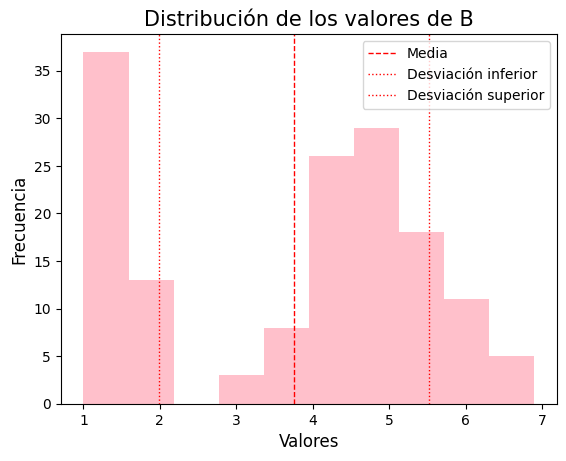

In [ ]:
plt.hist(B, bins=10, color='#FFC0CB')
plt.title('Distribución de los valores de B', fontsize=15)
plt.xlabel('Valores', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

plt.axvline(media_B, color='r', linestyle='dashed', linewidth=1, label='Media')

plt.axvline(media_B-B.std(ddof=1), color='r', linestyle='dotted', linewidth=1, label='Desviación inferior')
plt.axvline(media_B+B.std(ddof=1), color='r', linestyle='dotted', linewidth=1, label='Desviación superior')
plt.legend()

**Covarianza**

In [ ]:
np.cov(A,B)

array([[0.68569351, 1.27431544],
       [1.27431544, 3.11627785]])

In [ ]:
sum([(x-media_A)*(y-media_B)/(len(A)-1) for (x,y) in list(zip(A,B))])

1.274315436241611

In [ ]:
cov_AB = sum([(x-media_A)*(y-media_B)/(len(A)-1) for (x,y) in list(zip(A,B))])

**Correlación de Pearson**

In [ ]:
corr_pearson = cov_AB / np.sqrt(var_A*var_B)

In [ ]:
corr_pearson

0.8717537758865831

In [ ]:
np.corrcoef(A,B)

array([[1.        , 0.87175378],
       [0.87175378, 1.        ]])